Text(0, 0.5, '전기자동차 대수')

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


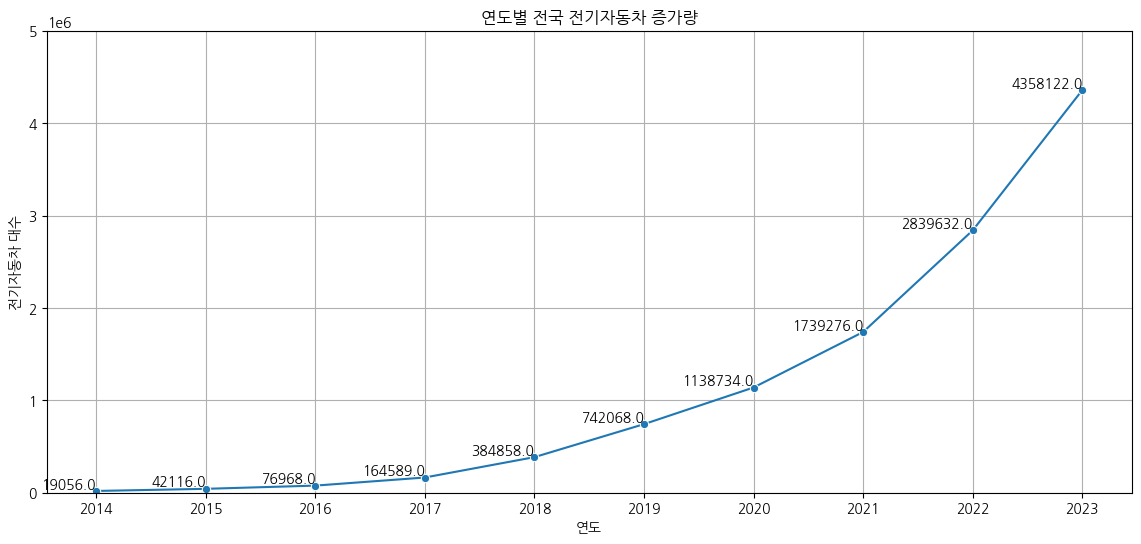

In [1]:
#연도별 전국 전기자동차 증가량
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 10
plt.figure(figsize=(14,6))
car_file = pd.read_csv("C:\\코딩온\\프로젝트\\자동차 - 복사본\\2014년~2023년 자동차 등록자료 통계.xlsx.csv", index_col=0 ,encoding='cp949')
car_total = car_file["계"]
car_country=car_file.loc[:,:"제주"]

plt.ylim([0,5000000])
plt.grid("both")
sns.lineplot(data=car_file["계"][1:], marker='o')            #연도별 전국 전기자동차 대수

#enumerate 와 plt.text 함수를 사용하여 데이터 포인트에 해당하는 값을 그래프 상에 표시
for i, value in enumerate(car_total):                       #enumerate는 반복가는한 객체(car_total시리즈)의 인덱스와 값을 반환/ i는 인덱스 value는 값
    #plt.text함수를 이용하여 텍스트를 그래프에 추가한다.
    plt.text(car_total.index[i], value, str(value), ha='right', va='bottom')       
    #'car_total.index[i]' : x좌표로 해당 데이터 포인트의 인덱스를 사용
    #'value' : y좌표로 해당 데이터 포인트의 값을 사용
    #'str(value)' : 텍스트로 표시할 내용은 데이터 포인트의 값
    #'ha='center' : 텍스트의 가로 정렬을 중앙으로 설정 # 난 right로 바꿧다
    #'va='bottom' : 텍스트의 세로 정렬을 아래쪽으로 설정

plt.title("연도별 전국 전기자동차 증가량")
plt.xlabel("연도")
plt.ylabel("전기자동차 대수")


C:\Users\User\AppData\Local\Temp\ipykernel_30316\347300433.py:5: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  Charge_file = pd.read_csv("C:\\코딩온\\프로젝트\\충전소 - 복사본\\한국환경공단_전기차 충전소 위치 및 운영정보(설치년도 포함)_20231031 - 복사본.csv", index_col=0 ,encoding='cp949')


Text(0.5, 1.0, '연도별 전국 전기차 충전소 설치 현황')

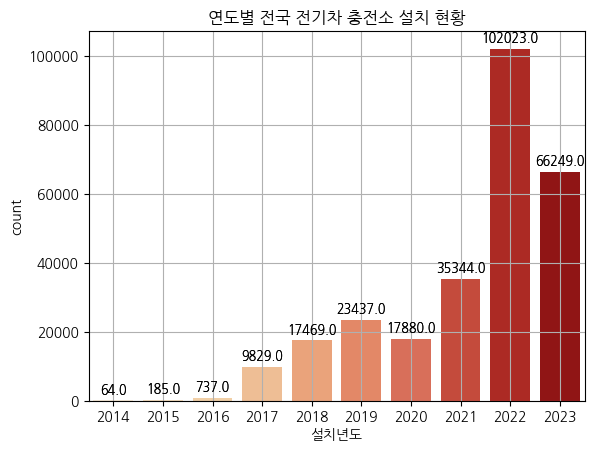

In [14]:
#연도별 전꾹 전기차 충전소 설치 현황
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 10

Charge_file = pd.read_csv("C:\\코딩온\\프로젝트\\충전소 - 복사본\\한국환경공단_전기차 충전소 위치 및 운영정보(설치년도 포함)_20231031 - 복사본.csv", index_col=0 ,encoding='cp949')

df = Charge_file.loc[:,["시도","이용자제한"]]

Newindex=df[(df.index >= 2014) & (df.index <= 2023)]
Newindex

sns.countplot(x = Newindex.index , data = Newindex  ,palette='OrRd')  #전국 전기차 충전소 증가량

ax = sns.countplot(x=Newindex.index, data=Newindex, palette='OrRd')
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='baseline', fontsize=9, color='black', xytext=(0, 5),
                textcoords='offset points')


plt.grid(True)
plt.title("연도별 전국 전기차 충전소 설치 현황")


C:\Users\User\AppData\Local\Temp\ipykernel_30316\1605338216.py:13: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  Charge_file = pd.read_csv("C:\\코딩온\\프로젝트\\충전소 - 복사본\\한국환경공단_전기차 충전소 위치 및 운영정보(설치년도 포함)_20231031 - 복사본.csv", index_col=0 ,encoding='cp949')
C:\Users\User\AppData\Local\Temp\ipykernel_30316\1605338216.py:23: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(data=car_file["계"][1:],label="자동차",ax=ax2, palette='YlGnBu')


<Figure size 1400x600 with 0 Axes>

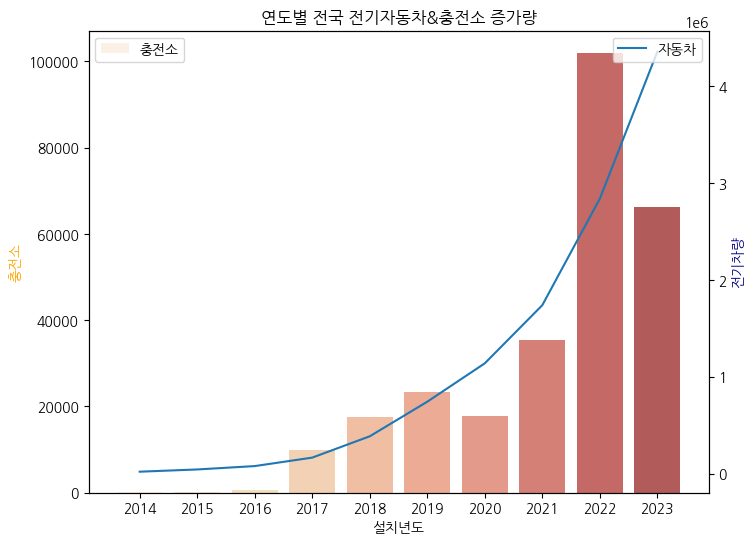

In [12]:
#연도별 전국 전기자동차&충전소 증가량
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['font.family'] = 'NanumGothic'
plt.rcParams['font.size'] = 10

plt.figure(figsize=(14,6))
car_file = pd.read_csv("C:\\코딩온\\프로젝트\\자동차 - 복사본\\2014년~2023년 자동차 등록자료 통계.xlsx.csv", index_col=0 ,encoding='cp949')
car_total = car_file["계"]
car_country=car_file.loc[:,:"제주"]
Charge_file = pd.read_csv("C:\\코딩온\\프로젝트\\충전소 - 복사본\\한국환경공단_전기차 충전소 위치 및 운영정보(설치년도 포함)_20231031 - 복사본.csv", index_col=0 ,encoding='cp949')
df = Charge_file.loc[:,["시도","이용자제한"]]
Newindex=df[(df.index >= 2014) & (df.index <= 2023)]

fig, ax1 = plt.subplots(figsize=(8, 6))
x=Newindex.reset_index().groupby('설치년도').count().index
y=Newindex.reset_index().groupby('설치년도').count().iloc[:,1]
sns.barplot(x=x, y=y,  ax=ax1, color='b', alpha=0.7, label='충전소', palette='OrRd')
#plt.grid(True)
ax2 = ax1.twinx()
sns.lineplot(data=car_file["계"][1:],label="자동차",ax=ax2, palette='YlGnBu')
ax1.set_ylabel('충전소', color='orange')
ax2.set_ylabel('전기차량', color='navy')
ax1.legend(loc='upper left')
ax2.legend(loc='upper right')
plt.title("연도별 전국 전기자동차&충전소 증가량")
plt.show()


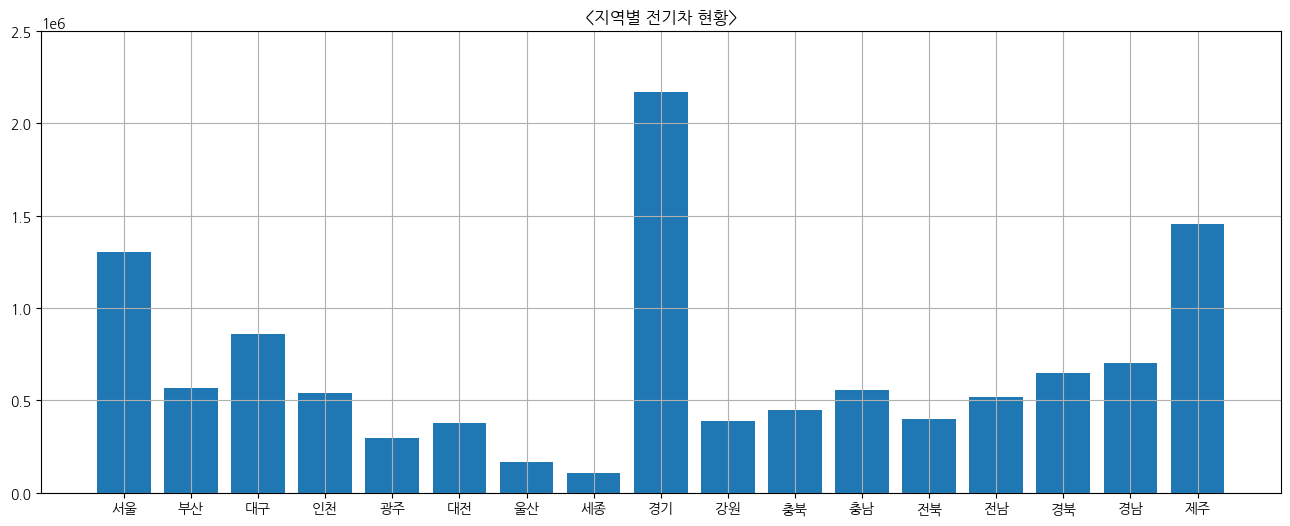

In [15]:
#지역별 전기차 현황
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,6))
plt.ylim([0,2500000])
car_file = pd.read_csv("C:\\코딩온\\프로젝트\\자동차 - 복사본\\2014년~2023년 자동차 등록자료 통계.xlsx.csv", index_col=0 ,encoding='cp949')

car_file.loc[:,"서울":"제주"][1:]
car_city=car_file.loc[:,"서울":"제주"][1:].sum()

plt.bar(car_city.index,car_city.values )
plt.title("<지역별 전기차 현황>")
plt.grid(True)

C:\Users\User\AppData\Local\Temp\ipykernel_30316\3276536772.py:6: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  Charge_file = pd.read_csv("C:\\코딩온\\프로젝트\\충전소 - 복사본\\한국환경공단_전기차 충전소 위치 및 운영정보(설치년도 포함)_20231031 - 복사본.csv", index_col=0 ,encoding='cp949')


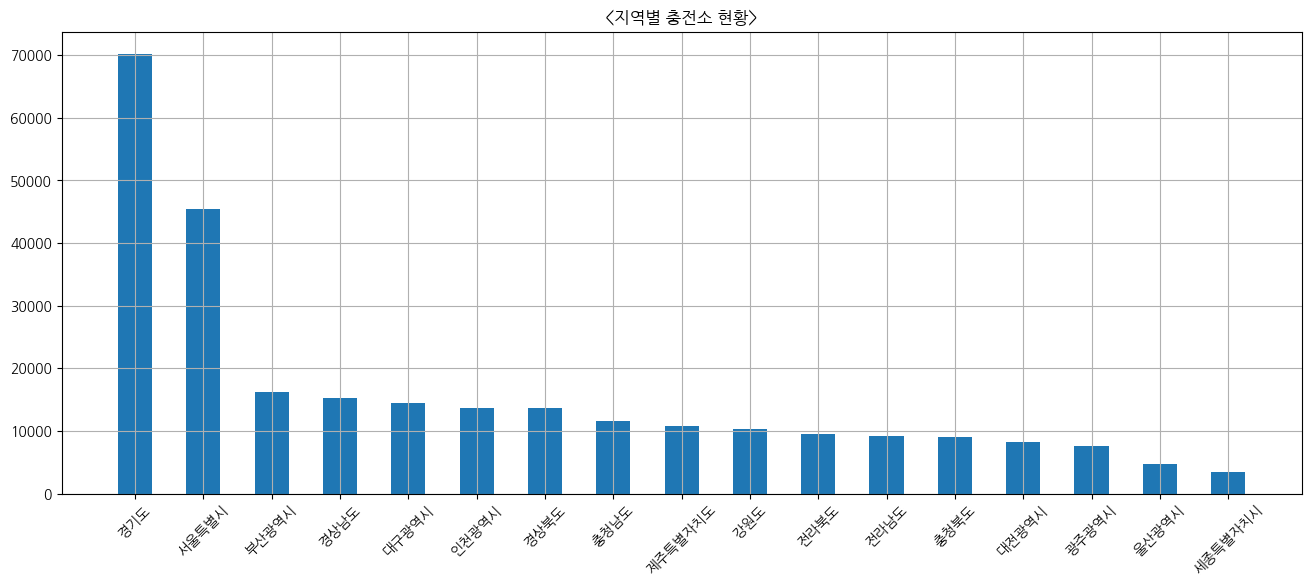

In [16]:
#지역별 충전소 현황
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,6))
Charge_file = pd.read_csv("C:\\코딩온\\프로젝트\\충전소 - 복사본\\한국환경공단_전기차 충전소 위치 및 운영정보(설치년도 포함)_20231031 - 복사본.csv", index_col=0 ,encoding='cp949')


CityCharge_file = Charge_file["시도"].value_counts()

plt.bar(CityCharge_file.index, CityCharge_file.values, width=0.5)
plt.xticks(rotation=45)
plt.title("<지역별 충전소 현황>")
plt.grid('both')


In [92]:
# 지역별 전기자동차 충전소 시각화
import pandas as pd
import folium
import json

# CVS 파일 읽기
Charge_file = pd.read_csv("C:\\코딩온\\프로젝트\\충전소 - 복사본\\한국환경공단_전기차 충전소 위치 및 운영정보(설치년도 포함)_20231031 - 복사본.csv", index_col=0 ,encoding='cp949')
# 코드를 실행시켰을 때 지도 위치에 대한 위도 경도(서울 기준)
lat, long = 37.5665, 126.9780

# 코로플레스를 위한 시/군/구별 좌표 json파일 가져오기
geo_path = 'C:\\Users\\User\\Downloads\\TL_SCCO_CTPRVN.json'   
geo_str = json.load(open(geo_path, encoding='utf-8'))

Charge_count = pd.pivot_table(Charge_file, index='시도', values='군구', aggfunc='count')

# 코로플레스 지도 그리기
m = folium.Map(location=[lat, long], zoom_start=11, tiles='Stamen Toner')  #tiles = 'Stamen Toner', 'OpenStreetMap', 'Stamen Terrain'
folium.Choropleth(
    geo_data = geo_str,
    data = Charge_count['군구'],
    columns = ['시도','군구'],
               fill_color = 'YlGn', # 'BuGn', 'BuPu', 'GnBu', 'OrRd', 'PuBu', 'PuBuGn', 'PuRd', 'RdPu', 'YlGn', 'YlGnBu', 'YlOrBr', 'YlOrRd'
               key_on = 'feature.properties.CTP_KOR_NM',
               legend_name='Number of Charging station (%)').add_to(m)


m.save('CarCharge_choropleth.html')

m

C:\Users\User\AppData\Local\Temp\ipykernel_32488\3163353425.py:7: DtypeWarning: Columns (11) have mixed types. Specify dtype option on import or set low_memory=False.
  Charge_file = pd.read_csv("C:\\코딩온\\프로젝트\\충전소 - 복사본\\한국환경공단_전기차 충전소 위치 및 운영정보(설치년도 포함)_20231031 - 복사본.csv", index_col=0 ,encoding='cp949')


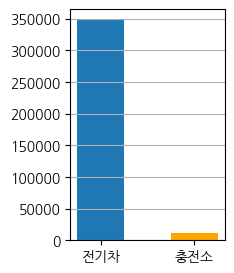

In [31]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(2,3))
x = np.arange(2)            #주어진 범위와 간격에 따라 균일한 값을 갖는 어레이 반환
CarandCharge = ['전기차','충전소']   #제주도 전기차 대수 ,충전소 수
values = [347612, 10734]
colors = ['#1F77B4', 'orange']

plt.bar(x, values, color=colors, width=0.5)
plt.grid(axis="y")
plt.xticks(x, CarandCharge)

plt.show()

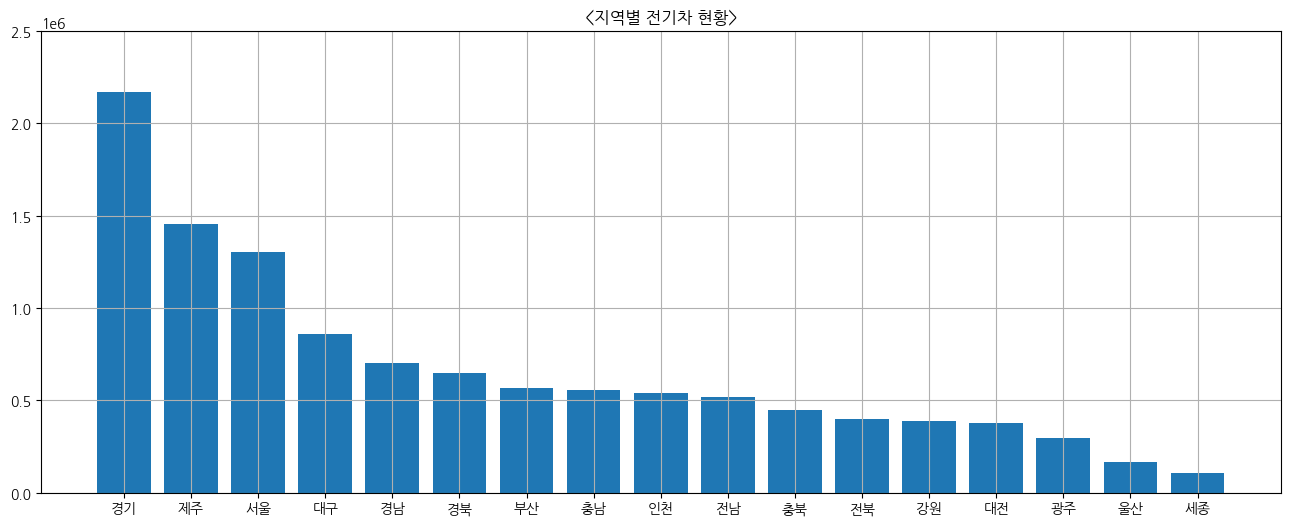

In [38]:
#지역별 전기차 현황
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(16,6))
plt.ylim([0,2500000])
car_file = pd.read_csv("C:\\코딩온\\프로젝트\\자동차 - 복사본\\2014년~2023년 자동차 등록자료 통계.xlsx.csv", index_col=0 ,encoding='cp949')

car_file.loc[:,"서울":"제주"][1:]
car_city=car_file.loc[:,"서울":"제주"][1:].sum().sort_values(ascending=0)

plt.bar(car_city.index,car_city.values )
plt.title("<지역별 전기차 현황>")
plt.grid(True)

Text(0.5, 1.0, '연도별 전기차 보조금 지원액')

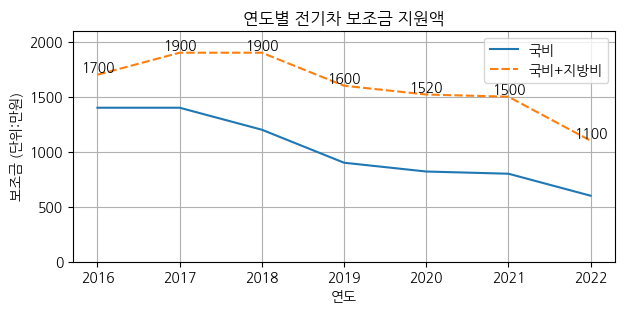

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(7, 3)) 
plt.ylim([0,2100])

car_money = pd.read_csv("C:\\코딩온\\프로젝트\\연도별 전기차 보조금 지원액.csv", index_col=0 ,encoding='cp949')
sns.lineplot(data = car_money)

money_total=car_money["국비+지방비"]

 #enumerate 와 plt.text 함수를 사용하여 데이터 포인트에 해당하는 값을 그래프 상에 표시
for i, value in enumerate(money_total):                       #enumerate는 반복가는한 객체(car_total시리즈)의 인덱스와 값을 반환/ i는 인덱스 value는 값
     #plt.text함수를 이용하여 텍스트를 그래프에 추가한다.
    plt.text(money_total.index[i], value, str(value), ha='center', va='bottom')       
     #'car_total.index[i]' : x좌표로 해당 데이터 포인트의 인덱스를 사용
     #'value' : y좌표로 해당 데이터 포인트의 값을 사용
     #'str(value)' : 텍스트로 표시할 내용은 데이터 포인트의 값
     #'ha='center' : 텍스트의 가로 정렬을 중앙으로 설정 # 난 right로 바꿧다
     #'va='bottom' : 텍스트의 세로 정렬을 아래쪽으로 설정



plt.grid(True)
plt.ylabel("보조금 (단위:만원)")
plt.title("연도별 전기차 보조금 지원액")